In [12]:
%matplotlib inline
import bluepyopt as bpop
import epileptor_evaluator
import epileptor_util
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
import pickle
import ukf


def save_obj(obj, name):
    with open('obj/' + name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_obj(name):
    with open('obj7953937_success/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
    

def plot_sim_trace(sim, x=None, *argv):
    fig = plt.figure(figsize=(10,2))
    if x is None:
        plt.plot(sim.noisy_data[0], *argv)
    else:
        plt.plot(x, sim.noisy_data[0], *argv)
    return fig

In [2]:
def reload_packages():
    global epileptor_util, epileptor_evaluator, ukf
    epileptor_util = reload(epileptor_util)
    epileptor_evaluator = reload(epileptor_evaluator)
    ukf = reload(ukf)

('colors: ', (0.87557328757593189, 0.9247590606495486, 0.97022266711218885, 1.0))


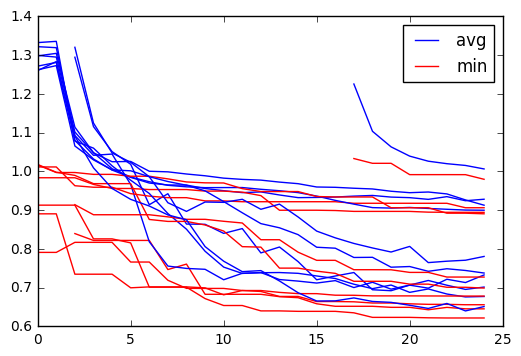

In [65]:
avg = []
gmin = []
colors = plt.get_cmap('Blues',60)
print('colors: ', colors(7))
for i in range(1,11):
    log = load_obj('log' + str(i))
    avg.append([])
    gmin.append([])
    for g in log:
        avg[i-1].append(g['avg'])
        gmin[i-1].append(g['min'])
    if i < 10:
        plt.plot(avg[i-1], 'b')
        plt.plot(gmin[i-1], 'r')
plt.plot(avg[i-1], 'b', label='avg')
plt.plot(gmin[i-1], 'r', label='min')
plt.legend()
plt.show()

## Load the parameters from the BluePy optimization

In [86]:
params = {}
hall_of_fame = {}
for i in range(10):
    params[i] = load_obj('params' + str(i+1))
    hall_of_fame[i] = load_obj('hall_of_fame' + str(i+1))

## Get target
If the target is not saved (i.e. not from data or simulation was not explicitly saved), generate a new one using default parameters. Two files have been saved to be used as targets. One is an EDF file downloaded from ieeg.org; the other is a PKL file containing a simulation using the default parameters from Jirsa.

In [219]:
filename = '/Users/emilyschlafly/BU/Kramer_rotation/' + \
    'ieeg_data/I002_A0003_D010/outputEdf_EDF/outputEdf_0.edf'
# filename = '/Users/emilyschlafly/BU/Kramer_rotation/ieeg_data/target.pkl'

To make a plot that resembles that in the Jirsa paper, use the following:

    jirsa = epileptor_util.epileptor_model(observation_sigmas=25e-4, 
                                        z_init=3.8, noise_ensemble2=15e-2, 
                                        x1_init=0.07, y1_init=0.69, x2_init=-0.7,
                                        g_init=25e-3, dt_sample=0.1)
    jirsa.generate_simulation(plot=False)
    plt.figure(figsize=(10,2))
    time = np.arange(0, jirsa.total_time, jirsa.dt_sample)
    plt.plot(time, jirsa.noisy_data[0], label='-x1+x2')
    plt.plot(time, jirsa.augmented_state[5,:], label='z')
    plt.legend()
    plt.show()
    
Otherwise, we can run a simulation using the default parameters described in the paper.

In [443]:
reload_packages()
fn = epileptor_util.FN_model()

[0.25]

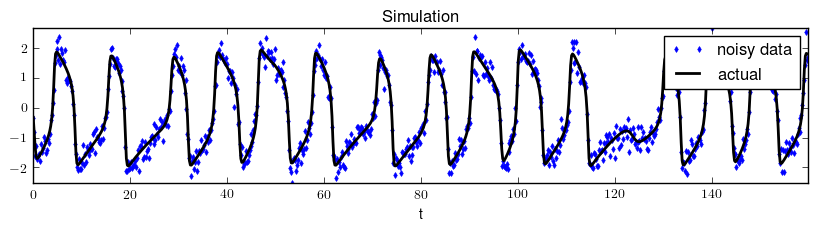

In [444]:
fn.generate_simulation()
fn.observation_sigmas

In [447]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-2, 25e-3])

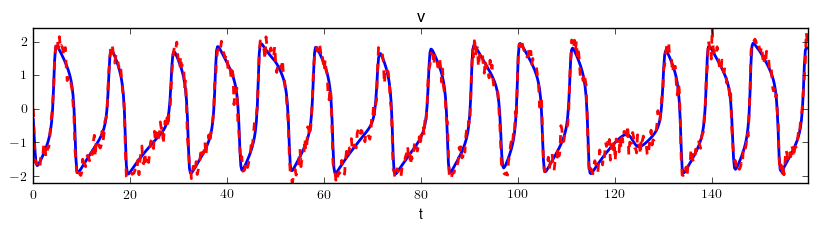

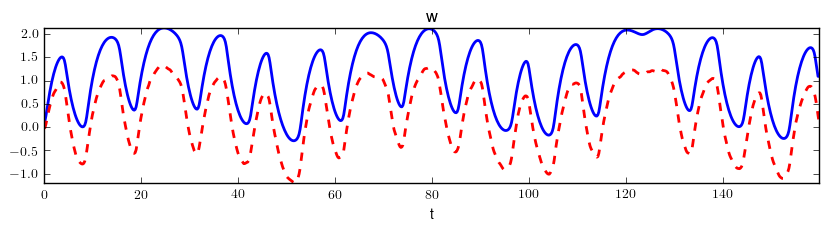

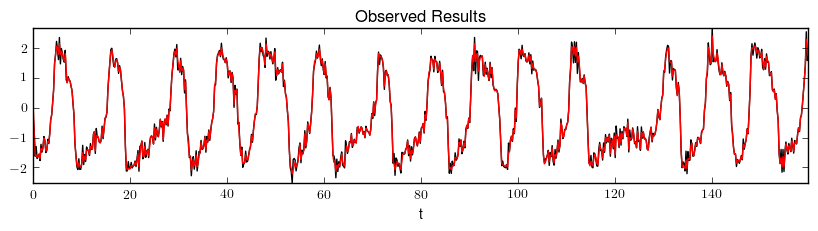

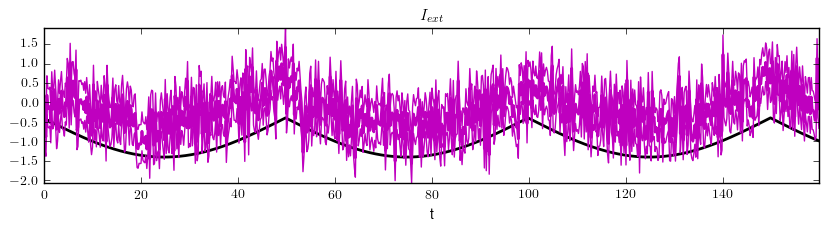

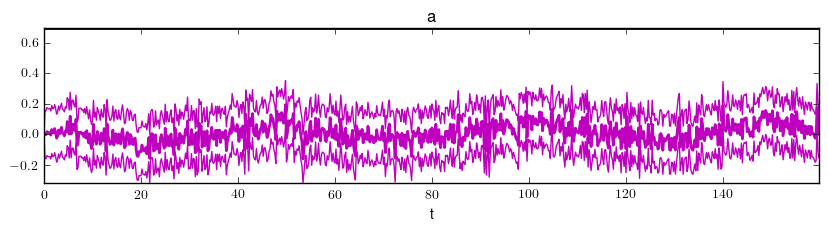

In [448]:
kf_fn.unscented_kalman()
kf_fn.plot_filter_results(separated=True)

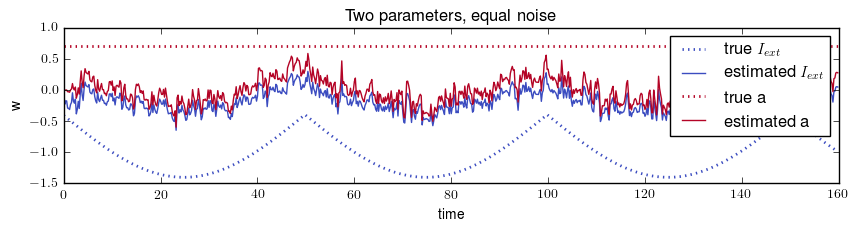

In [431]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 25e-3])
kf_fn.unscented_kalman()

time = fn.time

plt.figure(figsize=(10,2))
cmap = {}
k = 2
cmap[0] = plt.get_cmap('coolwarm', k)
# cmap[1] = plt.get_cmap('Reds', k)
for i in range(2):
    plt.plot(time, fn.augmented_state[i, :], ':', lw=2, color=cmap[0](2*i), label='true ' + fn.parameter_names[i])
    plt.plot(time, kf_fn.estimated_state[i,:], color=cmap[0](2*i), label='estimated ' + fn.parameter_names[i])
plt.legend()
plt.xlabel('time')
plt.ylabel('w')
plt.title('Two parameters, equal noise')
plt.show()

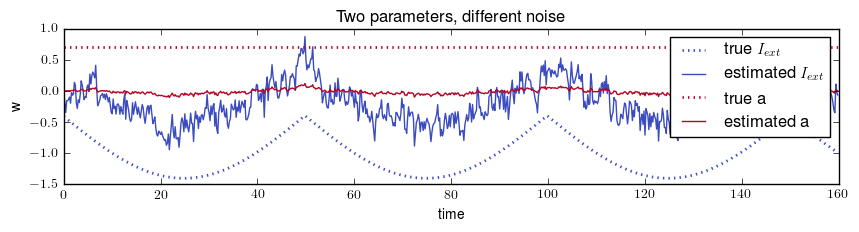

In [449]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 25e-4])
kf_fn.unscented_kalman()

time = fn.time

plt.figure(figsize=(10,2))
cmap = {}
k = 2
cmap[0] = plt.get_cmap('coolwarm', k)
# cmap[1] = plt.get_cmap('Reds', k)
for i in range(2):
    plt.plot(time, fn.augmented_state[i, :], ':', lw=2, color=cmap[0](2*i), label='true ' + fn.parameter_names[i])
    plt.plot(time, kf_fn.estimated_state[i,:], color=cmap[0](2*i), label='estimated ' + fn.parameter_names[i])
plt.legend()
plt.xlabel('time')
plt.ylabel('w')
plt.title('Two parameters, different noise')
plt.show()

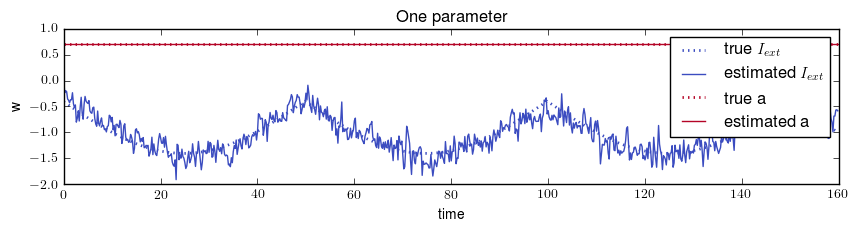

In [434]:
kf_fn = ukf.unscented_kalman_filter(fn, parameter_sigma=[25e-3, 0])
kf_fn.unscented_kalman()

time = fn.time

plt.figure(figsize=(10,2))
cmap = {}
k = 2
cmap[0] = plt.get_cmap('coolwarm', k)
# cmap[1] = plt.get_cmap('Reds', k)
for i in range(2):
    plt.plot(time, fn.augmented_state[i, :], ':', lw=2, color=cmap[0](2*i), label='true ' + fn.parameter_names[i])
    plt.plot(time, kf_fn.estimated_state[i,:], color=cmap[0](2*i), label='estimated ' + fn.parameter_names[i])
plt.legend()
plt.xlabel('time')
plt.ylabel('w')
plt.title('One parameter')
plt.show()

In [356]:
plt.colormaps()

[u'Accent',
 u'Accent_r',
 u'Blues',
 u'Blues_r',
 u'BrBG',
 u'BrBG_r',
 u'BuGn',
 u'BuGn_r',
 u'BuPu',
 u'BuPu_r',
 u'CMRmap',
 u'CMRmap_r',
 u'Dark2',
 u'Dark2_r',
 u'GnBu',
 u'GnBu_r',
 u'Greens',
 u'Greens_r',
 u'Greys',
 u'Greys_r',
 u'OrRd',
 u'OrRd_r',
 u'Oranges',
 u'Oranges_r',
 u'PRGn',
 u'PRGn_r',
 u'Paired',
 u'Paired_r',
 u'Pastel1',
 u'Pastel1_r',
 u'Pastel2',
 u'Pastel2_r',
 u'PiYG',
 u'PiYG_r',
 u'PuBu',
 u'PuBuGn',
 u'PuBuGn_r',
 u'PuBu_r',
 u'PuOr',
 u'PuOr_r',
 u'PuRd',
 u'PuRd_r',
 u'Purples',
 u'Purples_r',
 u'RdBu',
 u'RdBu_r',
 u'RdGy',
 u'RdGy_r',
 u'RdPu',
 u'RdPu_r',
 u'RdYlBu',
 u'RdYlBu_r',
 u'RdYlGn',
 u'RdYlGn_r',
 u'Reds',
 u'Reds_r',
 u'Set1',
 u'Set1_r',
 u'Set2',
 u'Set2_r',
 u'Set3',
 u'Set3_r',
 u'Spectral',
 u'Spectral_r',
 u'Wistia',
 u'Wistia_r',
 u'YlGn',
 u'YlGnBu',
 u'YlGnBu_r',
 u'YlGn_r',
 u'YlOrBr',
 u'YlOrBr_r',
 u'YlOrRd',
 u'YlOrRd_r',
 u'afmhot',
 u'afmhot_r',
 u'autumn',
 u'autumn_r',
 u'binary',
 u'binary_r',
 u'bone',
 u'bone_r',
 u'b

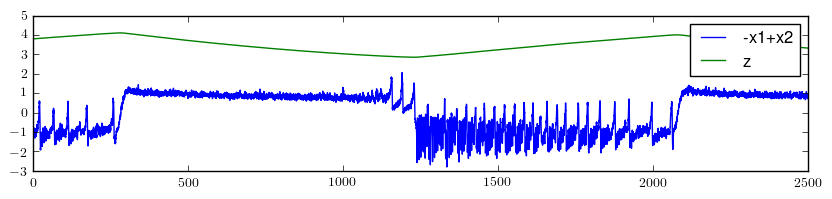

In [149]:
target = epileptor_util.epileptor_model()
target.generate_simulation(plot=False)
plt.figure(figsize=(10,2))
time = np.arange(0, target.total_time, target.dt_sample)
plt.plot(time, target.noisy_data[0], label='-x1+x2')
plt.plot(time, target.augmented_state[5,:], label='z')
plt.legend()
plt.show()

In [117]:
a = np.where(1 is True, 1, 0)
a

array(0)

In [184]:
evaluator = epileptor_evaluator.Epileptor_Evaluator(filename=filename)

In [186]:
evaluator.target[0]

array([-0.11986963, -0.19905235,  0.00399478, ...,  0.23503867,
       -0.07886429, -0.50305747])

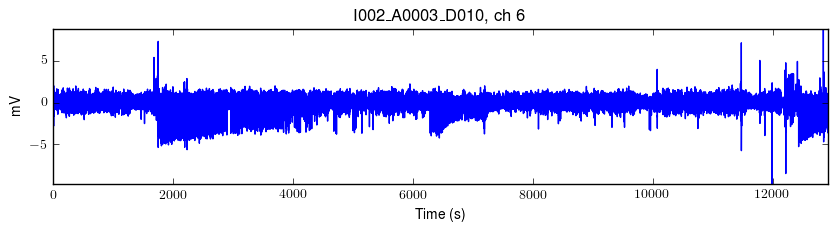

In [221]:
time = np.arange(0, len(target)/freq, 1/freq)
plt.figure(figsize=(10,2))
plt.plot(time, target)
plt.axis('tight')
plt.xlabel('Time (s)')
plt.ylabel('mV')
plt.title('I002\_A0003\_D010, ch 6')
plt.show()

Create the epileptor model object using the optimized parameters and set the noisy_data attribute of the object to the target data.

In [87]:
np.random.randint(1,100)

74

## State variables for target trace

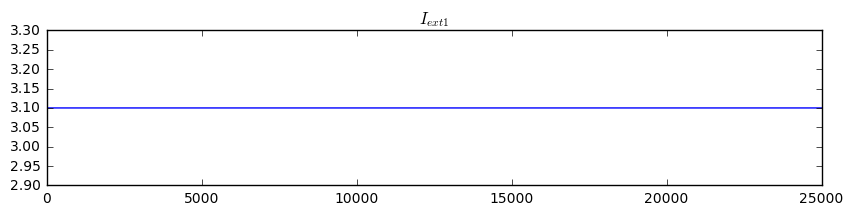

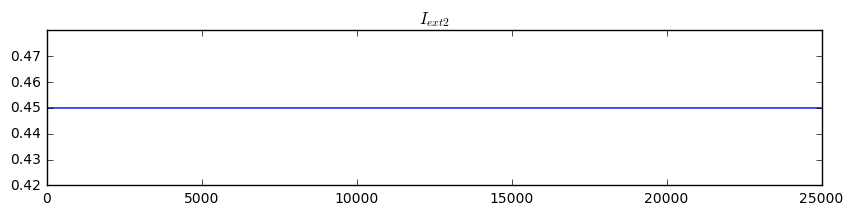

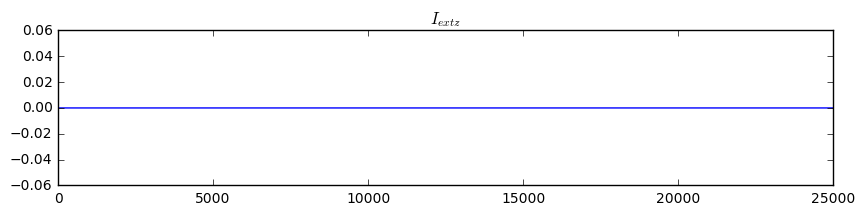

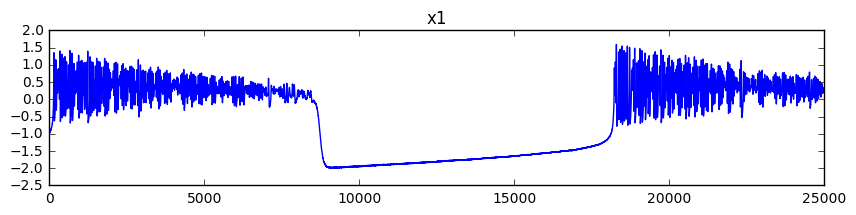

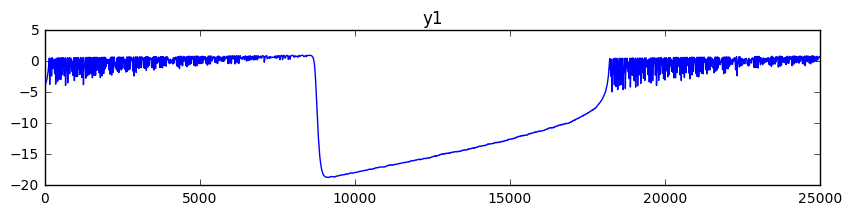

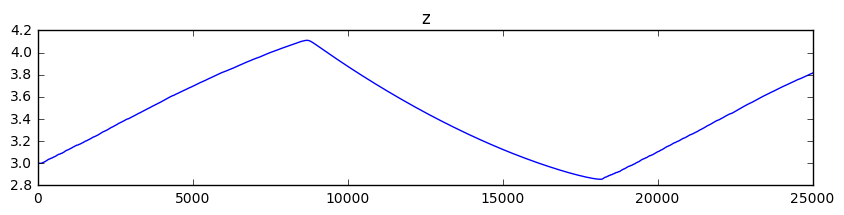

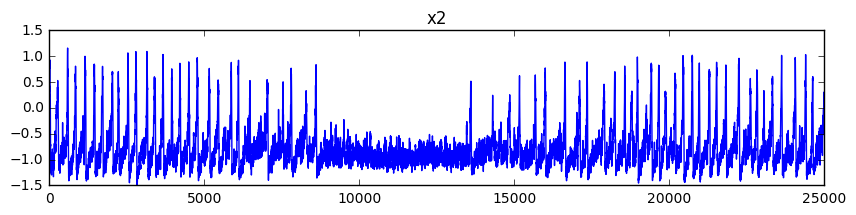

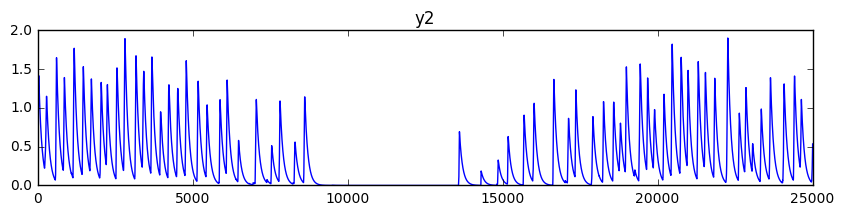

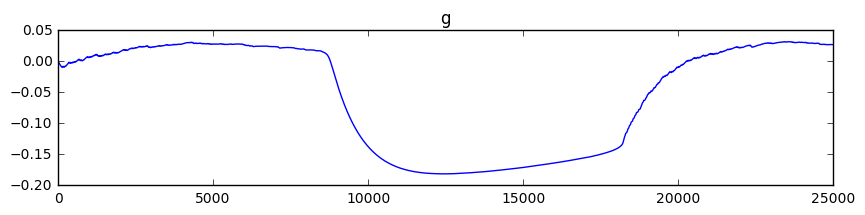

In [78]:
title_strings = np.hstack((target.parameter_names, target.var_names))
for i in range(target.dims_augmented_state):
    plt.figure(figsize=(10,2))
    plt.plot(target.augmented_state[i,:])
    plt.title(title_strings[i])
    plt.show()

In [40]:
for p in evaluator.ep_params:
    print(p[0])

y1_init
z_init
tau0
a
b
c
d
Irest1
Irest2


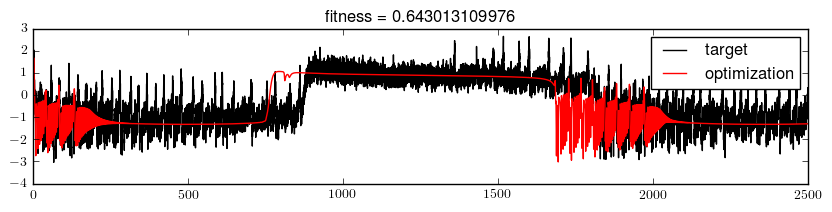

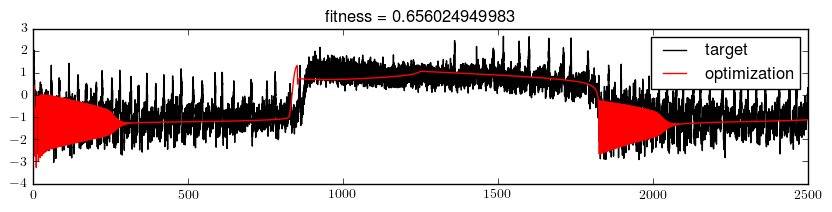

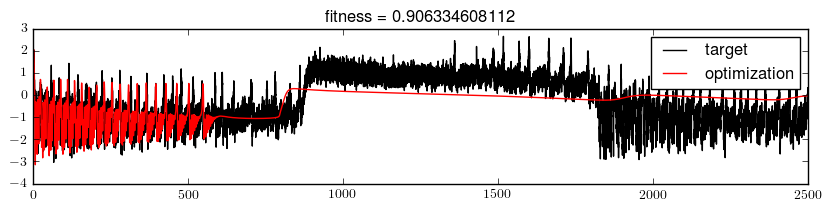

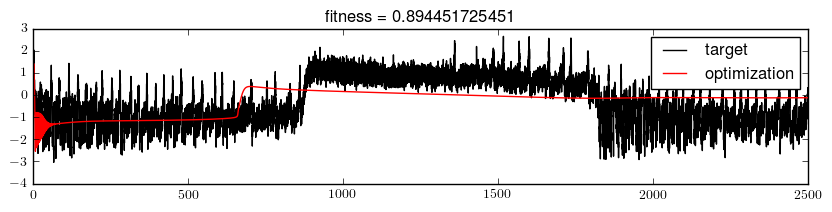

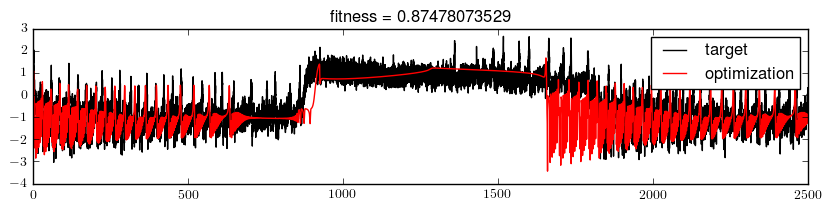

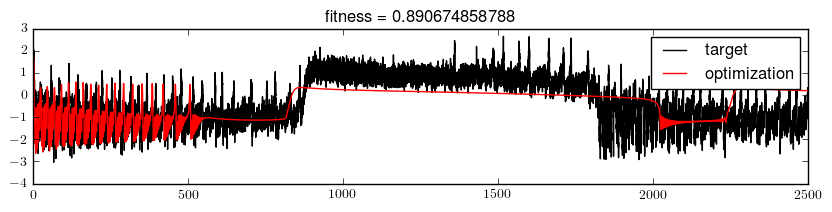

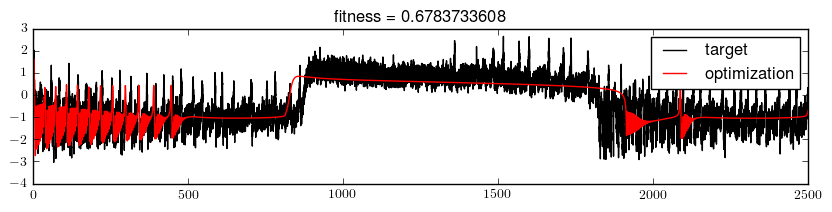

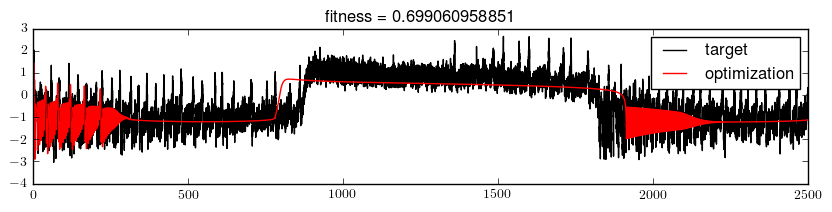

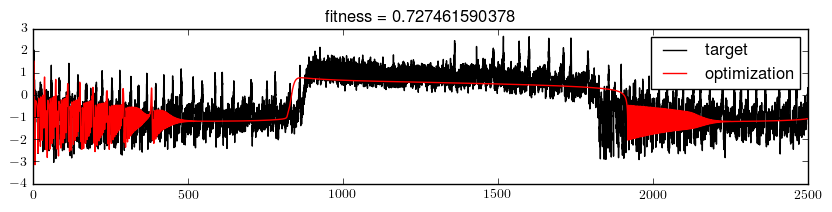

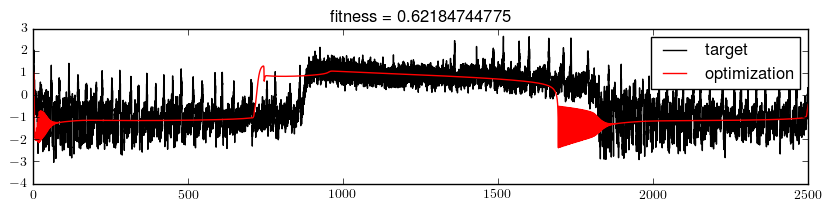

In [91]:
sim = {}
time = np.arange(0, target.total_time, target.dt_sample)
for n in range(10):
    sim[n] = epileptor_util.epileptor_model(params=params[n])
    sim[n].generate_simulation(plot=False)
    fitness = hall_of_fame[n][0].fitness.values[0]
    plt.figure(figsize=(10,2))
    plt.plot(time, target.noisy_data[0], 'k', label='target')
    plt.plot(time, sim[n].noisy_data[0], 'r', label='optimization')
    plt.title('fitness = ' + str(fitness))
    plt.legend()
    plt.show()

In [96]:
kf0 = kf[0]
kf0.state_sigma

0.015

In [222]:
target_sub, dt_sample, num_samples = epileptor_util.subsample_data(target, dt_sample=0.1,
                                                             sample_freq=freq)
target_sub.shape

(129250,)

In [227]:
reload_packages()

In [237]:
initial_estimate = kf_eeg.estimated_state[:,0]
initial_estimate[0:2] = kf_eeg.estimated_state[0:2,-1]
initial_estimate[2] = 1.
initial_estimate

array([ 26.86552517,   5.60843754,   1.        ,  -0.05993481,
         0.        ,   0.        ,  -0.11986963,   0.        ,   0.        ])

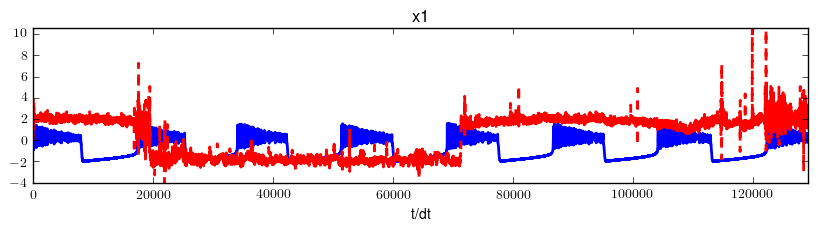

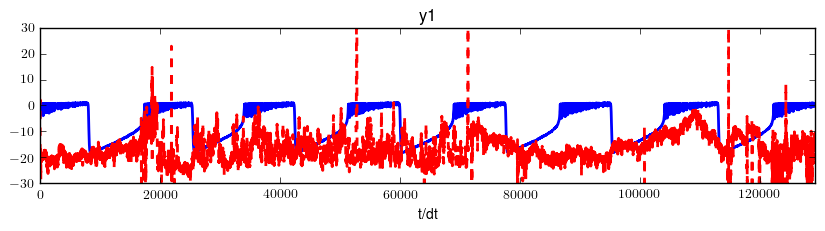

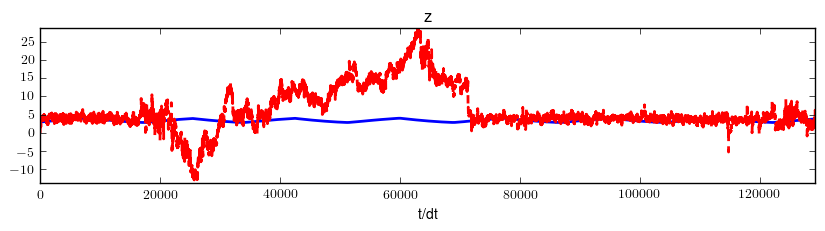

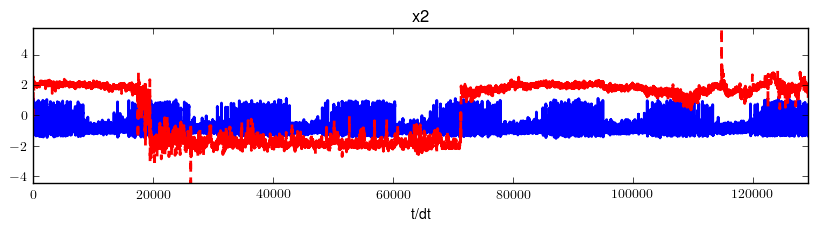

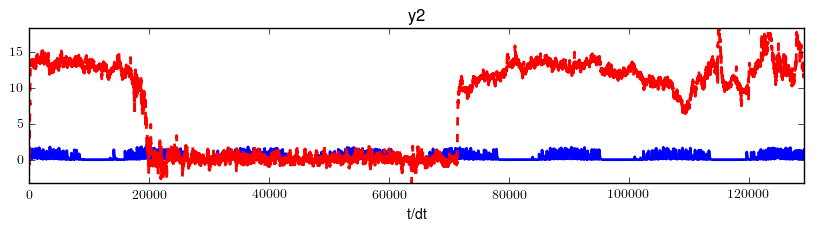

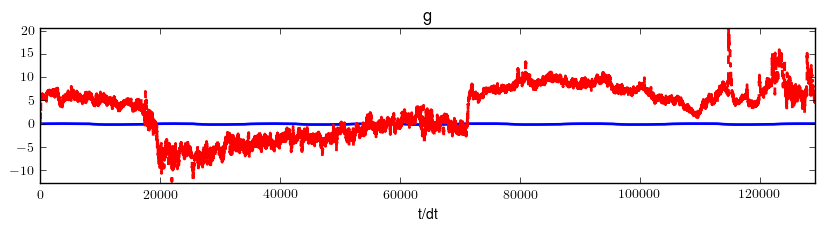

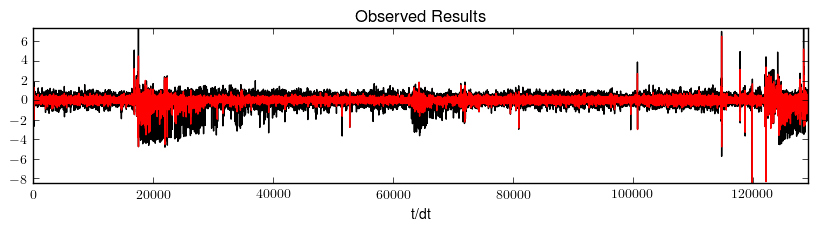

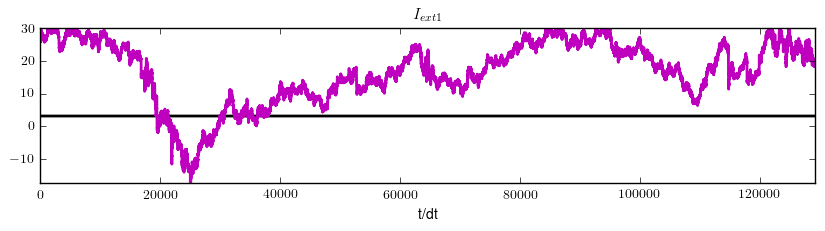

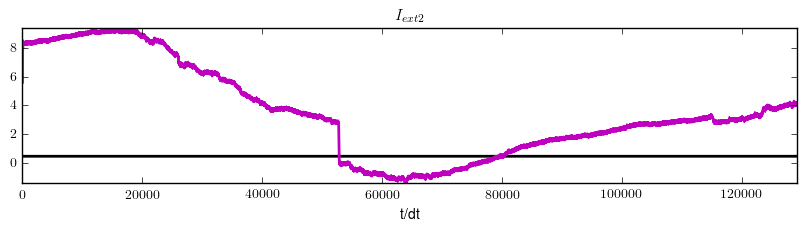

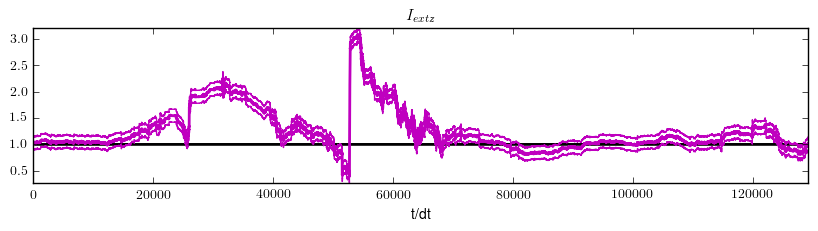

In [238]:
# evaluator.generate_simulation()
# target_sub, dt_sample, num_samples = epileptor_util.subsample_data(target, dt_sample=0.1,
#                                                              sample_freq=freq)
# total_time = num_samples * dt_sample
# sim_eeg = epileptor_util.epileptor_model(total_time=total_time, dt_sample=dt_sample)
# sim_eeg.generate_simulation(plot=True)
# sim_eeg.noisy_data = target_sub.reshape(1, -1)
# kf_eeg = ukf.unscented_kalman_filter(sim_eeg, state_sigma=25e-4)
# kf_eeg.unscented_kalman(initial_estimate='model')
initial_estimate = kf_eeg.estimated_state[:,0]
initial_estimate[0:2] = kf_eeg.estimated_state[0:2,-1]
initial_estimate[2] = 1.
kf_eeg.unscented_kalman(initial_estimate=initial_estimate)
kf_eeg.plot_filter_results(separated=True)


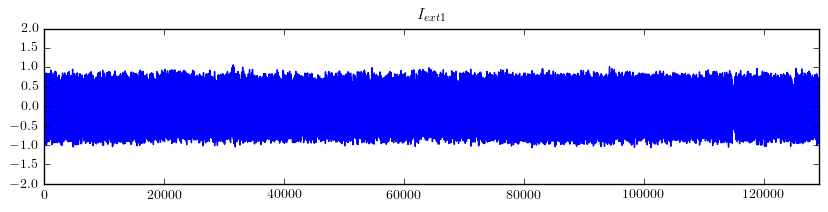

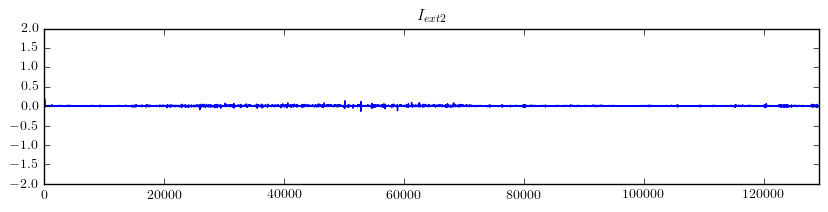

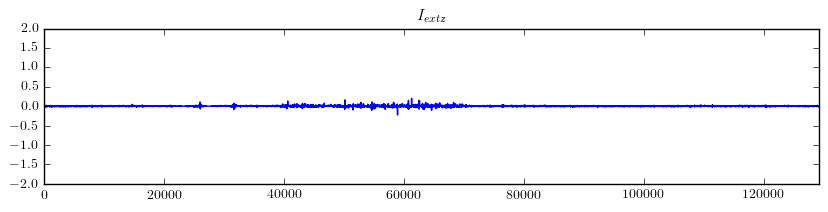

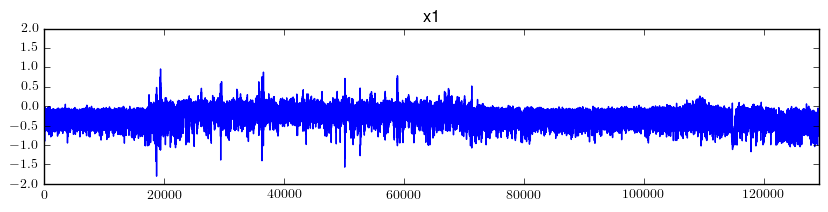

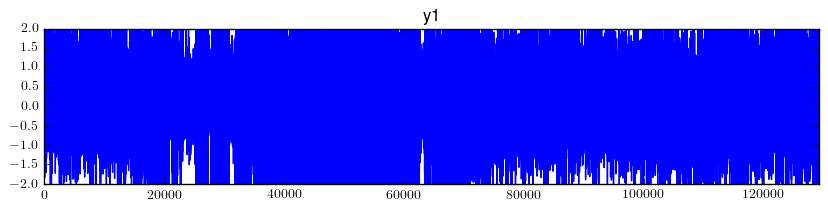

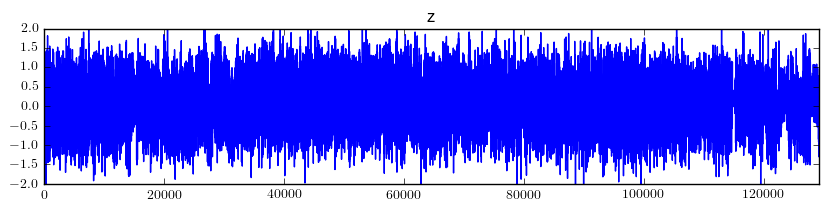

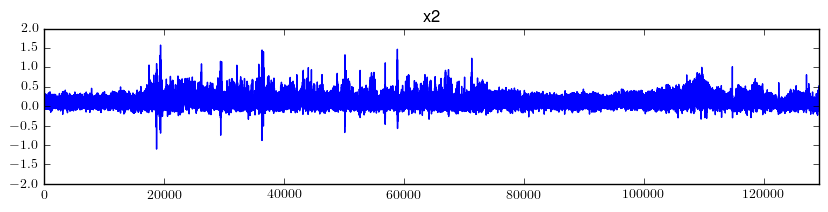

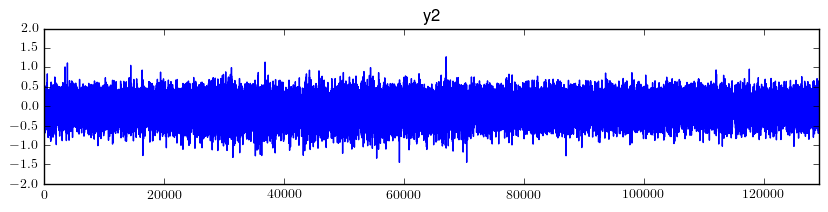

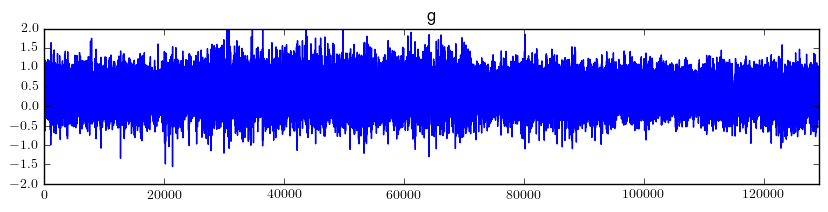

In [248]:
i = 0
for k in kf_eeg.Ks.reshape(9,-1):
    plt.figure(figsize=(10,2))
    plt.plot(k)
    plt.axis('tight')
    plt.ylim((-2., 2.))
    plt.title(title_strings[i])
    i += 1
    plt.show()

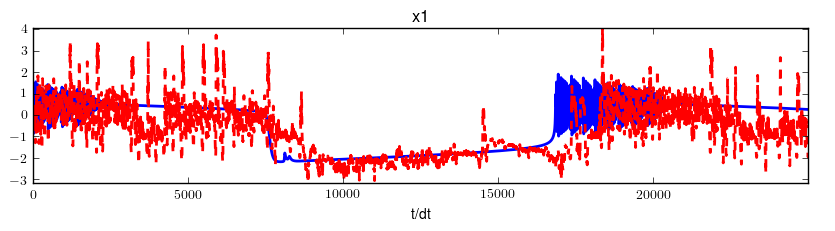

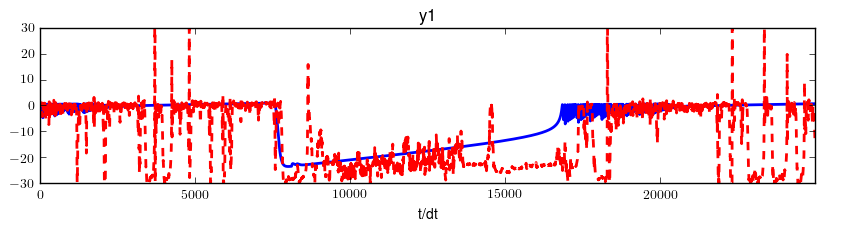

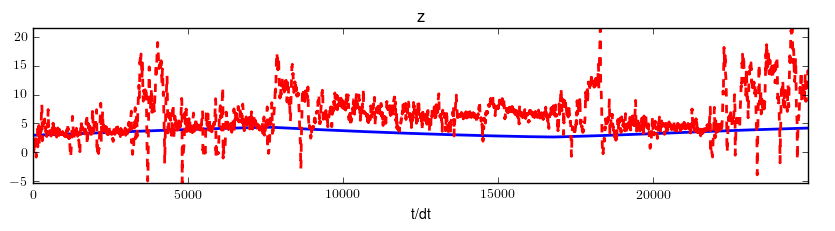

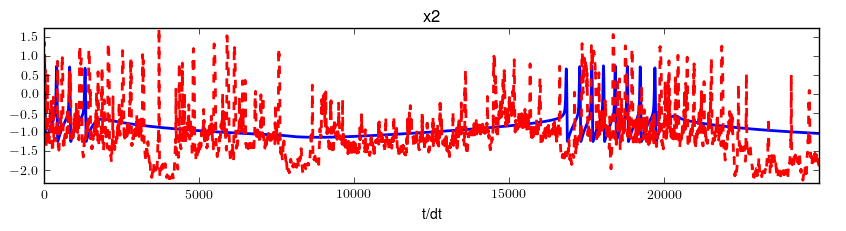

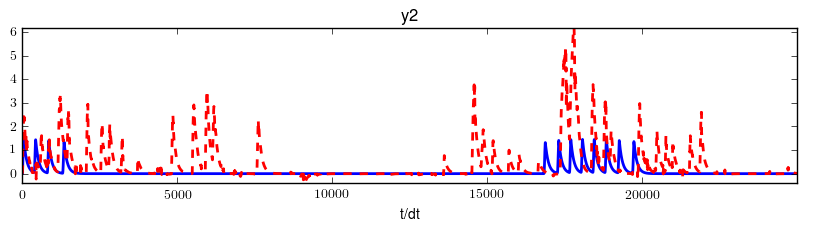

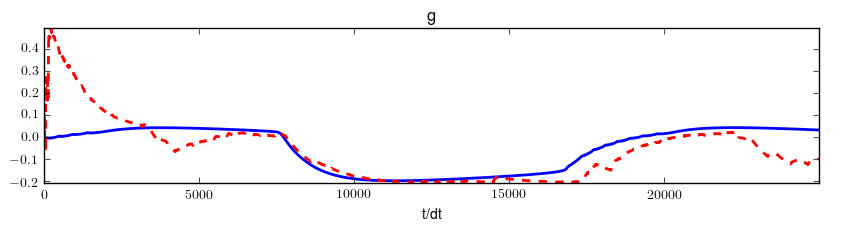

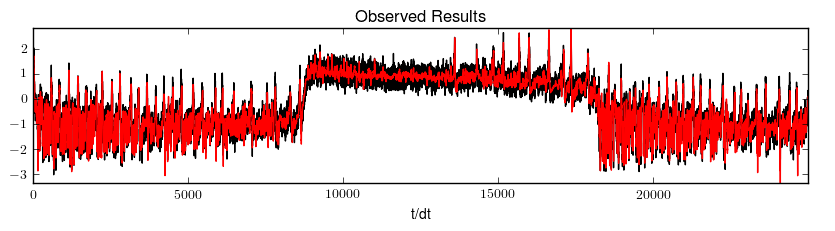

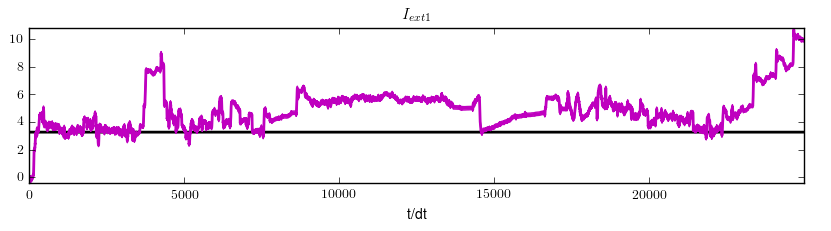

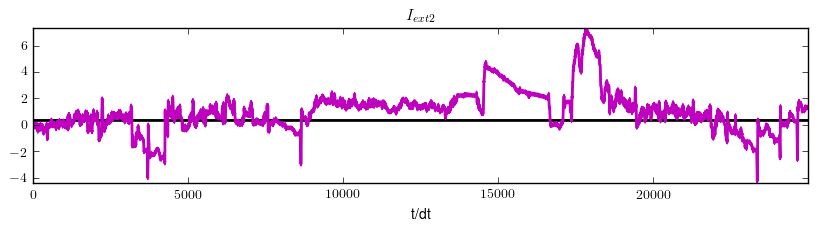

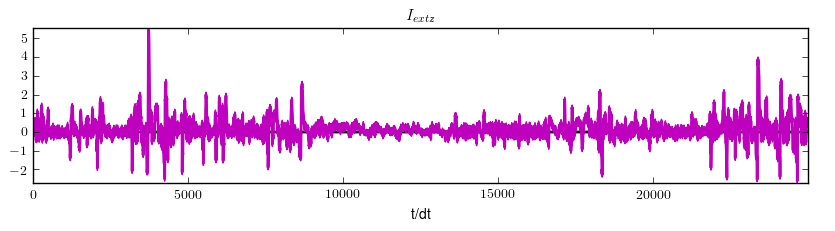

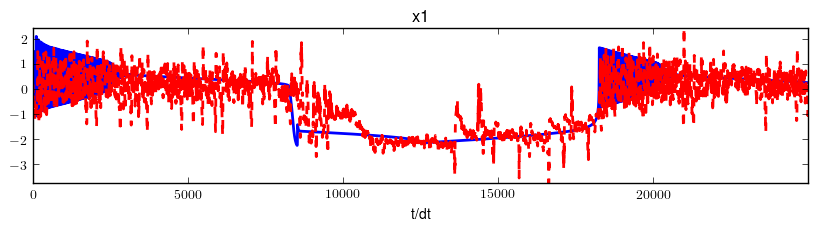

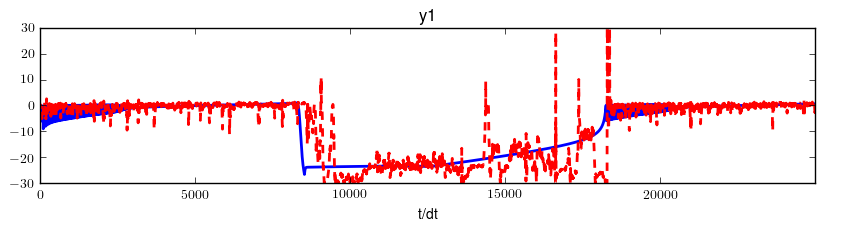

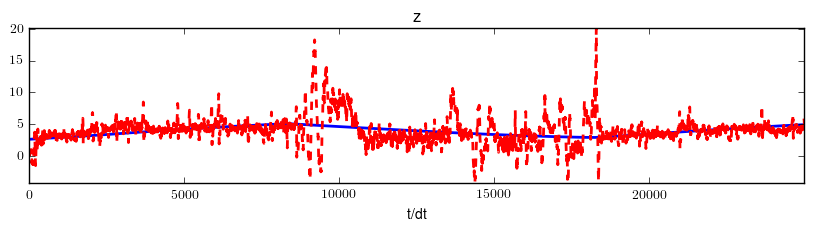

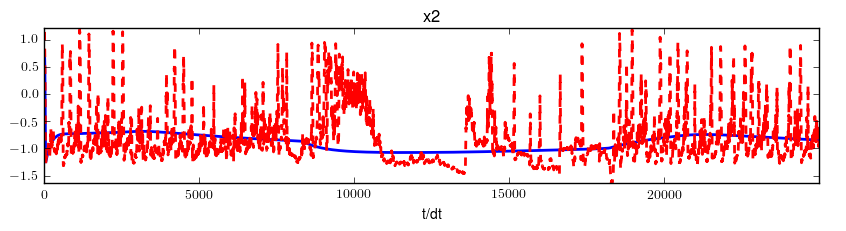

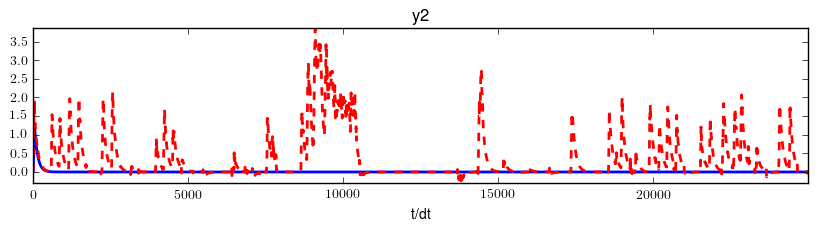

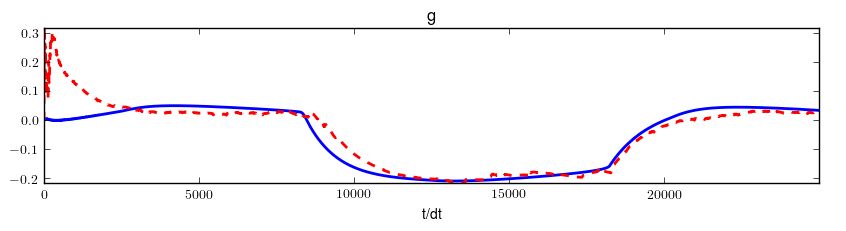

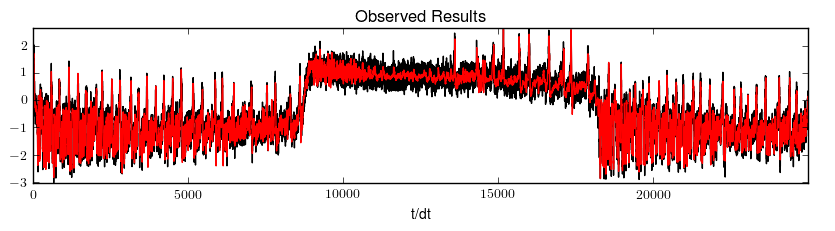

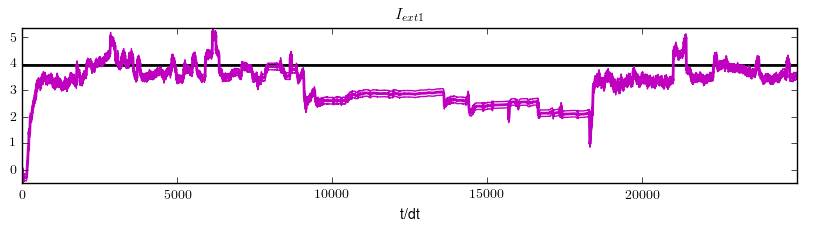

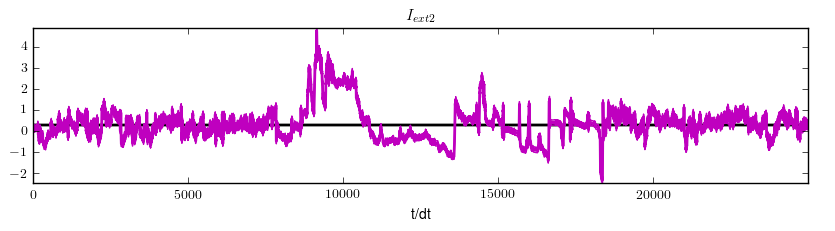

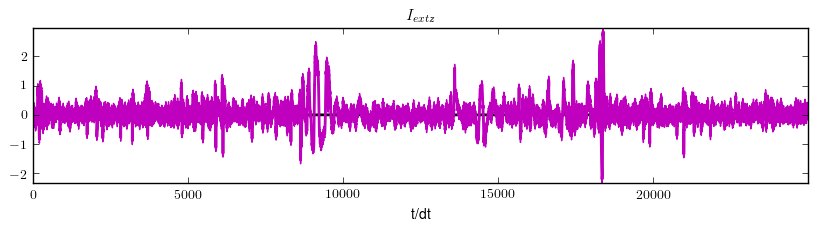

In [187]:
# reload_packages()
kf = {}
for i in range(2):
#     sim[i].noisy_data = target.noisy_data
    kf[i] = ukf.unscented_kalman_filter(sim[i])
    kf[i].unscented_kalman(initial_estimate='model')
    kf[i].plot_filter_results(separated=True)

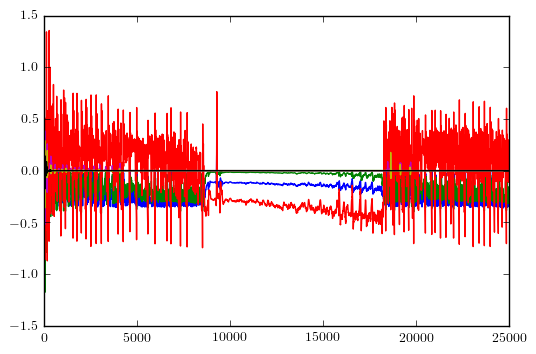

In [107]:
plt.plot(kf.Ks.reshape(7, 25000).T)
plt.show()

## After changing I_ext to reflect current injected into the second ensemble

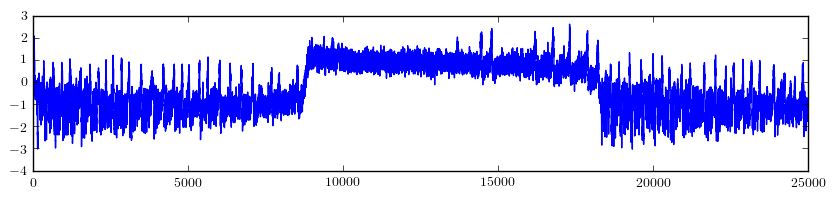

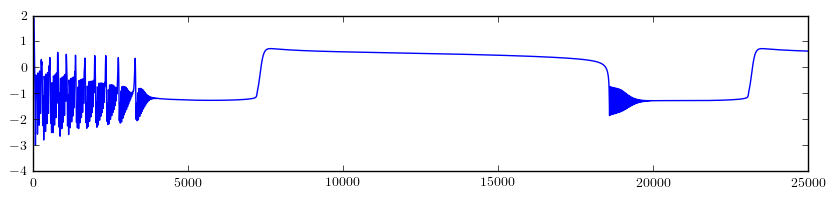

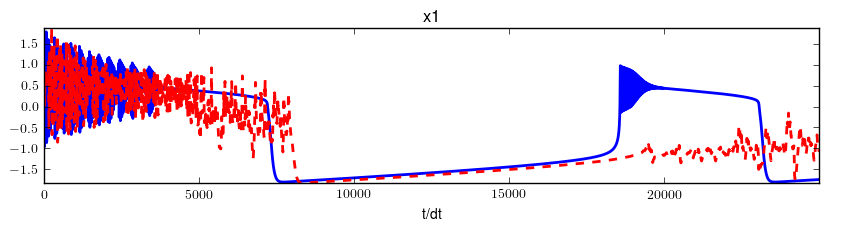

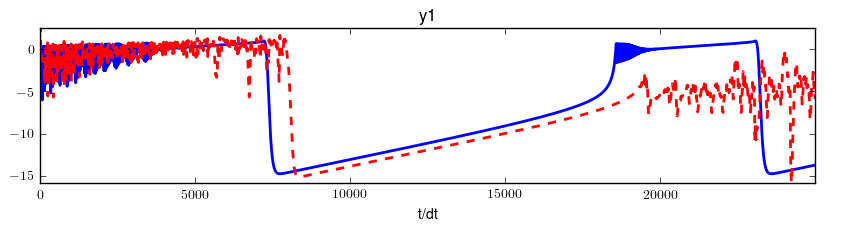

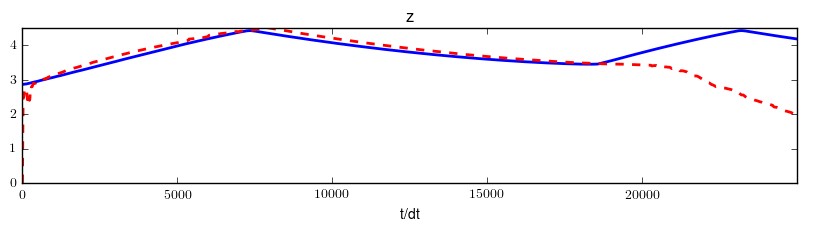

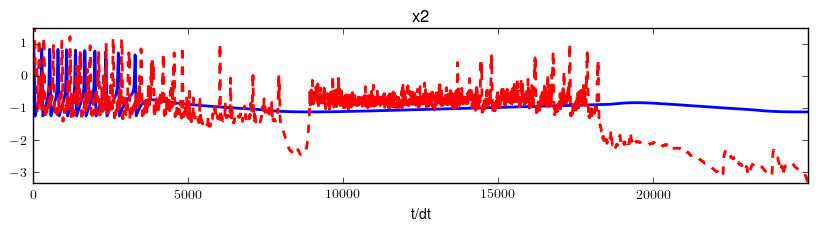

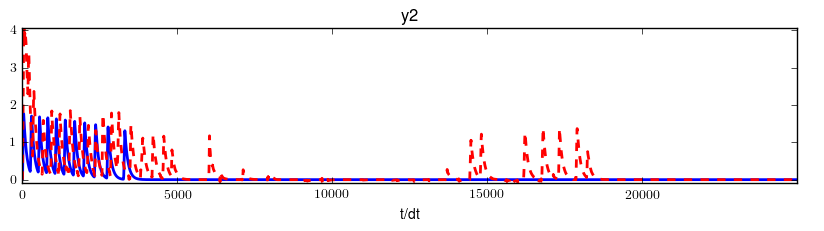

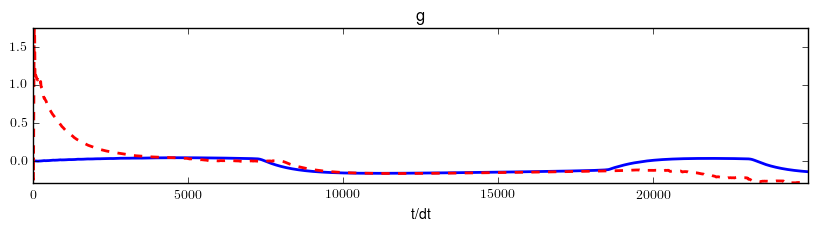

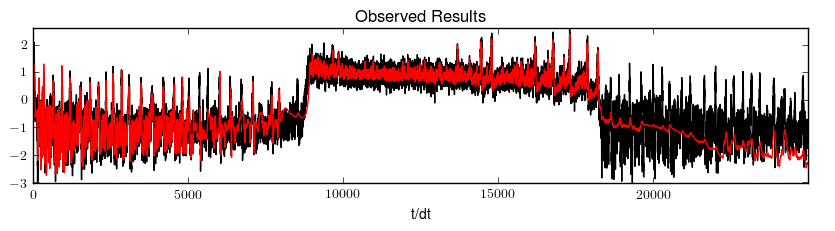

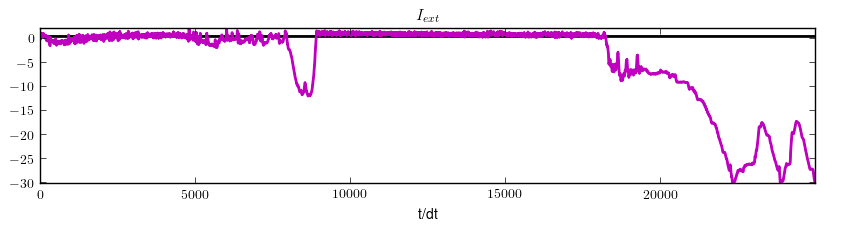

In [108]:
reload_packages()
target = epileptor_util.epileptor_model()
target.generate_simulation(plot=False)
plot_sim_trace(target)
sim = epileptor_util.epileptor_model(params=params0)
sim.generate_simulation(plot=False)
plot_sim_trace(sim)
sim.noisy_data = target.noisy_data
kf = ukf.unscented_kalman_filter(sim)
kf.unscented_kalman(initial_estimate='model')
kf.plot_filter_results(separated=True)

## After adding I_ext parameters for both ensembles and the z variable
By changing the _parameter_sigma_ attribute we can focus on any subset of the parameters. For example

    parameter_sigma=[0, 15e-3, 0]

will run such that only the current injected into the second ensemble is allowed to vary. Note that in the program a sigma of zero is reset to 1e-16 so that the Cholesky decomposition can still be used to generate the sigma points.

Running with all three parameters makes a mess. The following, however, works reasonably well:
    
    parameter_sigma=[15e-3, 15e-4, 0]

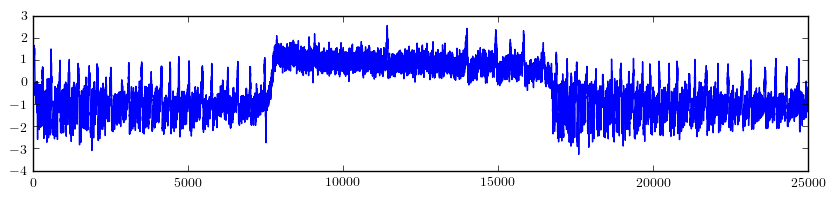

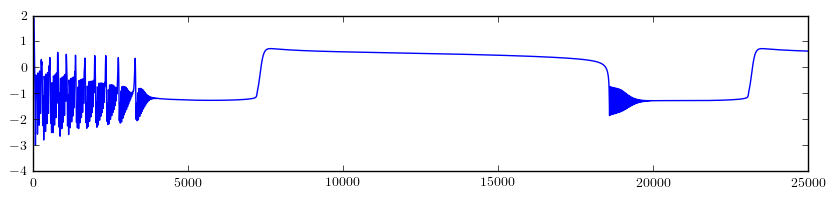

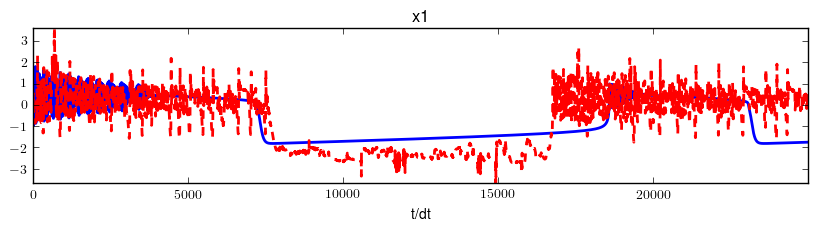

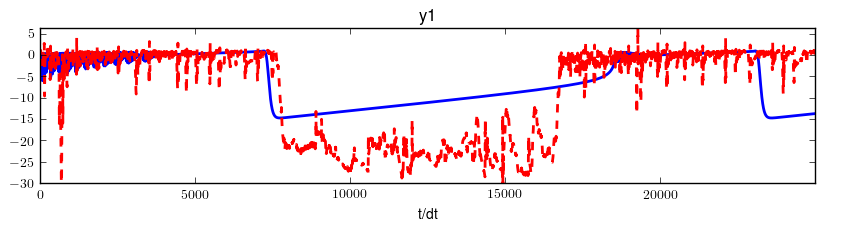

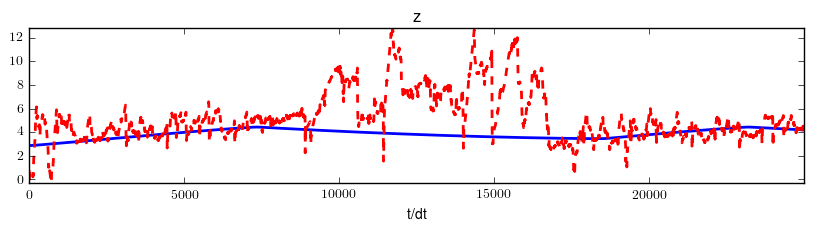

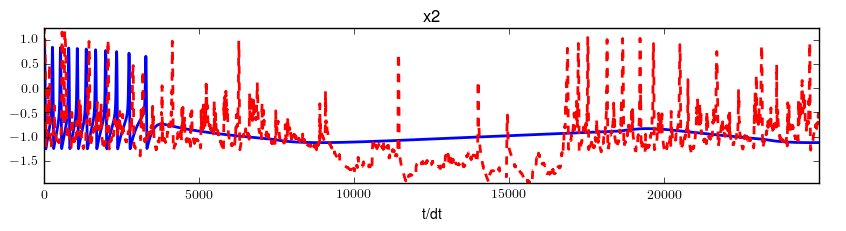

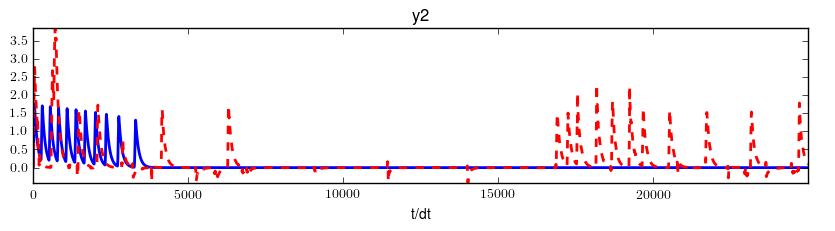

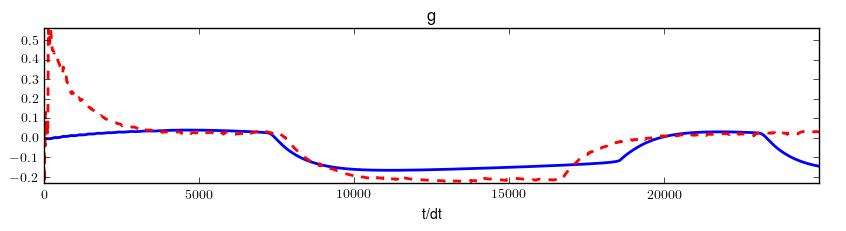

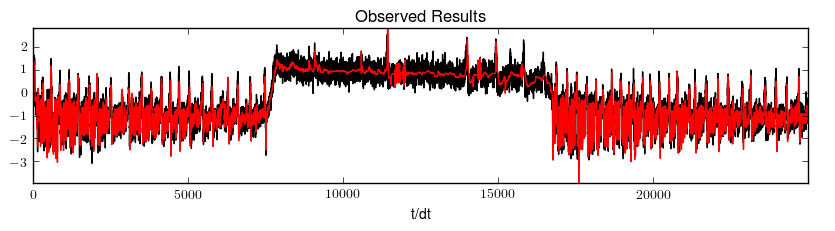

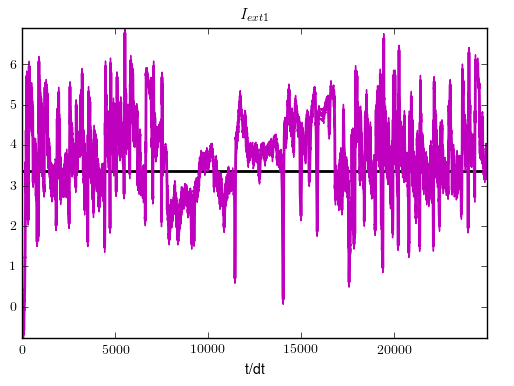

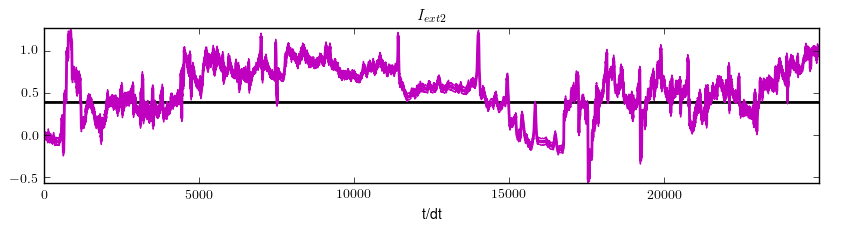

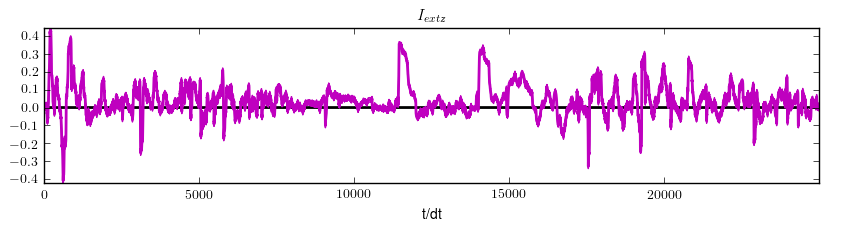

In [158]:
reload_packages()
target = epileptor_util.epileptor_model()
target.generate_simulation(plot=False)
plot_sim_trace(target)
sim = epileptor_util.epileptor_model(params=params0)
sim.generate_simulation(plot=False)
plot_sim_trace(sim)
sim.noisy_data = target.noisy_data
kf = ukf.unscented_kalman_filter(sim, parameter_sigma=[15e-3, 15e-4, 15e-5])
kf.unscented_kalman(initial_estimate='model')
kf.plot_filter_results(separated=True)

## Second pass
In this case, setting the initial estimate of the parameters to the final state of the parameters from a previous run does not make a huge improvement. The parameters were initialized to zero in the first place, though, which is at most 3.1 away from the actual value (in the case of _Irest1_).

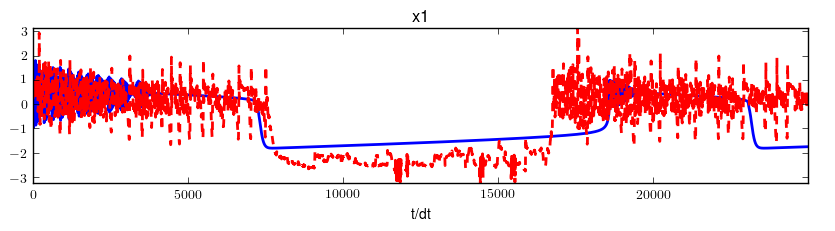

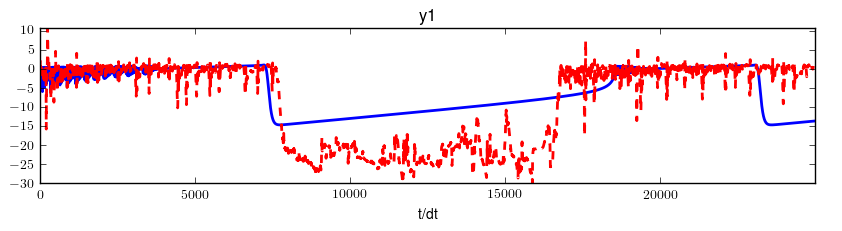

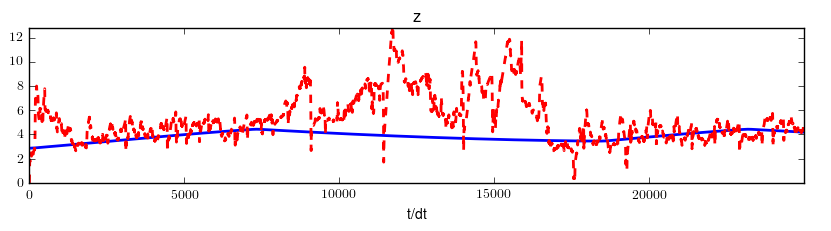

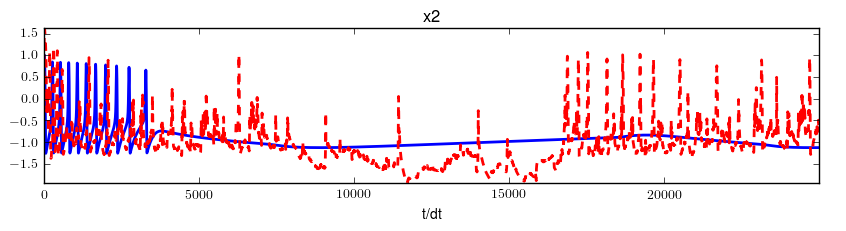

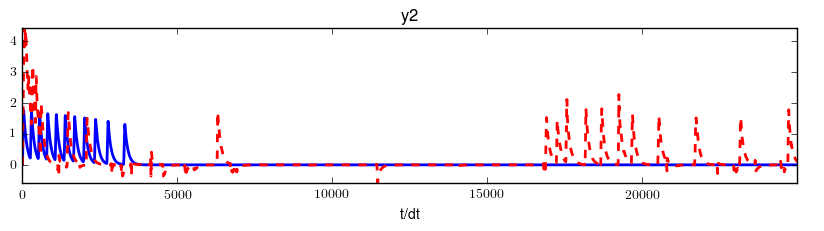

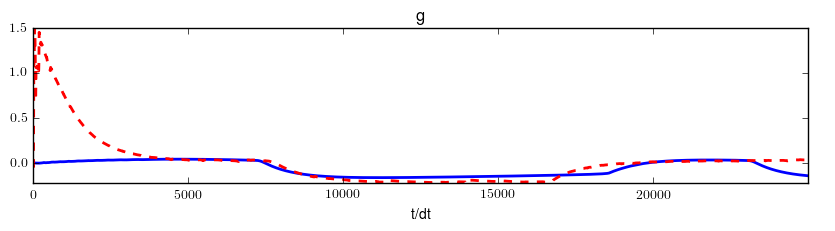

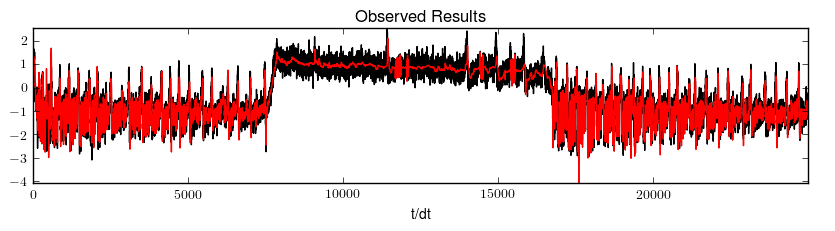

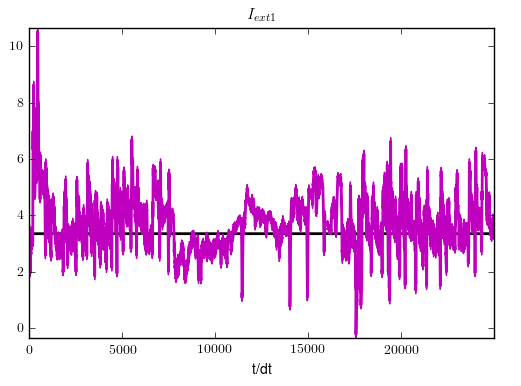

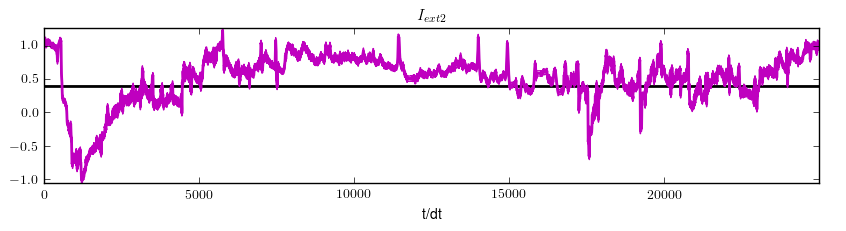

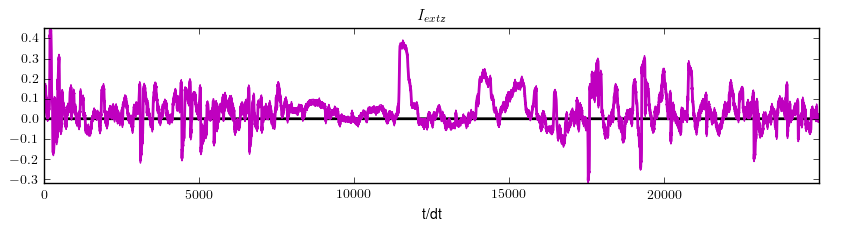

In [159]:
initial_estimate = kf.estimated_state[:, 0]
initial_estimate[:kf.model.dims_params] = kf.estimated_state[:kf.model.dims_params, -1]
kf.unscented_kalman(initial_estimate=initial_estimate)
kf.plot_filter_results(separated=True)